# Tensorflow 2
## Eager execution
* https://www.tensorflow.org/guide/eager
* Graph, Session 생성 없이 즉시 실행
* Tensorflow 2.0+ 기본 활성화
    * `tf.executing_eagerly(()` : enable eager on TF1
    * `tf.disable_v2_behavior()` : disable eager on TF2

In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
ret = tf.add(1, 2)
print(ret)

tf.Tensor(3, shape=(), dtype=int32)


## Tensor Object
* `tf.Tensor`
    * `shape` : shape
    * `dtype` : dtype
    * `name` : 이름
    * `device` : tensor가 생성될 장치 이름
    * `op` : tensor를 출력으로 생성하는 [`tf.Operation`](https://www.tensorflow.org/api_docs/python/tf/Operation), Error in eagar mode 
    * `graph` : tensor를 포함하는 [`tf.Graph`](https://www.tensorflow.org/api_docs/python/tf/Graph), Error in eagar mode 
    * `eval(feed_dict, session)` : 노드를 평가(실행), Error in eagar mode 
* 다차원 배열
* 계산 그래프에 있는 노드를 참조하는 핸들 대신 구체적인 값 참조
* GPU/TPU 등 가속기 메모리에 상주 가능
* Tensforflow 모든 연산은 자동으로 Python Native Type을 Tensor로 변환
    * 명시적 변환 : `tf.convert_to_tensor(value, dtype, dtype_hint, name)`
* dtype

|데이터 타입 이름|	파이썬 데이터 타입|설명|
|---|---|---|
|DT_FLOAT|	tf.float32|	32비트 부동소수점 숫자|
|DT_DOUBLE|	tf.float64|	64비트 부동소수점 숫자|
|DT_INT8|	tf.int8	|8비트 정수|
|DT_INT16|	tf.int16|	16비트 정수|
|DT_INT32|	tf.int32|	32비트 정수|
|DT_INT64|	tf.int64|	64비트 정수|
|DT_UINT8|	tf.uint8|	8비트 부호 없는 정수|
|DT_UINT16|	tf.uint16|	16비트 부호 없는 정수|
|DT_STRING|	tf.string|	가변 길이 바이트 배열이며 텐서의 각 요소는 바이트의 배열|
|DT_BOOL|	tf.bool|	참거짓값|
|DT_COMPLEX64|	tf.complex64|	2개의 32비트 부동소수점 숫자로 구성된 복소수로 각각 실수부와 허수부|
|DT_COMPLEX128|	tf.complex128|	2개의 64비트 부동소수점 숫자로 구성된 복소수로 각각 실수부와 허수부|
|DT_QINT8|	tf.qint8|	양자화 연산(quantized operation)에 사용되는 8비트 정수|
|DT_QINT32|	tf.qint32|	양자화 연산에 사용되는 32비트 정수|
|DT_QUINT8|	tf.quint8|	양자화 연산에 사용되는 8비트 부호 없는 정수|


In [88]:
tsr1 = tf.convert_to_tensor(1)
tsr2 = tf.convert_to_tensor(2)

ret2 = tf.add(tsr1, tsr2)
print(tsr1, tsr2, ret2)
print(ret.shape, ret.dtype)
#print(const.op)
#print(const.graph)


tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(2, shape=(), dtype=int32) tf.Tensor(3, shape=(), dtype=int32)
() <dtype: 'int32'>


### Broadcasting

In [72]:
ret3 = tf.add([[1,2],
               [3,4]], 1)
print(ret3)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


### Operator Overloading

In [74]:
print(ret2 * ret3)

tf.Tensor(
[[ 6  9]
 [12 15]], shape=(2, 2), dtype=int32)


### 형변환
* `tf.cast(x, dtype, name=None)` 
    * Alias for `tf.dtypes.cast` 


In [80]:
tensor1 = tf.convert_to_tensor(10)
print(tensor1)
tensor_f32 = tf.cast(tensor1, tf.float32)
print(tensor_f32)

tensor2 = tf.convert_to_tensor([1.8, 2.2])
print(tensor2)
tensor_int32 = tf.cast(tensor2, tf.int32)
print(tensor_int32)

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1.8 2.2], shape=(2,), dtype=float32)
tf.Tensor([1 2], shape=(2,), dtype=int32)


### NumPy 호환성
* Tensforflow 연산은 자동으로 NumPy 배열을 Tensor로 변환
    *  명시적 변환 : tf.convert_to_tensor(ndarray or list)
* NumPy 연산은 자동으로 Tensor를 NumPy 배열로 변환
    * 명시적 변환 : tensor.numpy(), np.array(tensor)

In [59]:
import numpy as np

ndarray1 = np.array([1,2,3,4])
ndarray2 = np.array([2,3,4,5])
tensor = tf.add(ndarray1, ndarray2)
print(ndarray1, ndarray2, tensor)
print(tensor.shape, tensor.dtype)
print(np.array(tensor), tensor.numpy())

print(np.add(tensor, 1))

[1 2 3 4] [2 3 4 5] tf.Tensor([3 5 7 9], shape=(4,), dtype=int32)
(4,) <dtype: 'int32'>
[3 5 7 9] [3 5 7 9]
[ 4  6  8 10]


* Tensor는 불변성(Immutable)

In [21]:
ndarray = np.array([1,2,3,4])
ndarray[2] = 9
print(ndarray)

[1 2 9 4]


In [75]:
tensor = tf.convert_to_tensor(ndarray)
print(tensor)
tensor[2] = 9 # Error caused by immutable

tf.Tensor([1 2 9 4], shape=(4,), dtype=int32)


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

### 축약 연산자
* ```tf.<operator>```를 축약 연산자로 사용가능

|TensorFlow 연산	|축약 연산자	|설명|
|---|---|---|
|tf.add()	|a + b|	a와 b를 더함|
tf.multiply()|	a * b|	a와 b를 곱함
tf.subtract()|	a - b|	a에서 b를 뺌
tf.divide()|	a / b|	a를 b로 나눔
tf.pow()|	a ** b|	$a^b$ 를 계산
tf.mod()|	a % b|	a를 b로 나눈 나머지를 구함
tf.logical_and()|	a & b|	a와 b의 논리곱을 구함. dtype은 반드시 tf.bool이어야 함
tf.greater()|	a > b|	$a > b$ 의 True/False 값을 반환
tf.greater_equal()|	a >= b|	$a \geq$ 의 True/False 값을 반환
tf.less_equal()|	a <= b|	$a \leq b$ 의 True/False 값을 반환
tf.less()|	a < b|	$a< b$ 의 True/False 값을 반환
tf.negative()|	-a|	a의 반대 부호 값을 반환
tf.logical_not()|	~a|	a의 반대의 참거짓을 반환. tf.bool 텐서만 적용 가능
tf.abs()|	abs(a)|	a의 각 원소의 절대값을 반환
tf.logical_or()|	a I b|	a와 b의 논리합을 구함. dtype은 반드시 tf.bool이어야 함

## Constant
* `tf.constant(value, dtype, shape, name)`
    * value : Tensor가 가질 값
    * dtype=None : 데이타 타입
    * shape=None : Tensor 모양
    * name='Const' : 이름
* 상수 값을 갖는 Tensor를 생성하는 함수

In [90]:
const = tf.constant(1.)
print(type(const))
print(const)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(1.0, shape=(), dtype=float32)


*  ```tf.identity(node, "name")``` 
    * 이름 지정 및 입력과 같은 shape과 contens를 갖는 tensor 반환

In [95]:
const_identity = tf.identity(const)
print(const_identity, const)
print(const_identity is const)
print(id(const_identity), id(const))

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
True
2055563289320 2055563289320


## Variable
* Tensor는 상태가 없고 변경 불가 객체(Immutable steteless object) 
* 훈련을 통해 변경될 값(weight, bias) 필요
* 값 변경을 위한 API 필요
* `tf.Variable(initVal)`
    * `assign(newVal)`
* `tf.assign_sub()`, `tf.scatter_update()` ...
* GradientTape에 의해 자동 추적

In [96]:
import tensorflow as tf

v = tf.Variable(1.0)
print(v)

v.assign(3,0)
print(v)

v.assign(tf.square(v))
print(v)
print(v.numpy())

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=9.0>
9.0


### 난수 생성
* 정규 분포(normal distribution)
    * `tf.random.normal(shape, mean, std)` : 정규 분포
    * `tf.truncated_normal(shape, mean, std)` : 절단 정규 분포
        * shape : 생성하려는 난수의 갯수와 형태
        * mean : 평균
        * std : 표준편차
* 균등 분포(uniform distribution)
    * `tf.random_uniform(shape, min, max)` : 균등분포

In [31]:
import tensorflow as tf

print(tf.random.normal((3,3)))
print(tf.random.truncated_normal((3,3)))
print(tf.random.uniform((3,3)))

tf.Tensor(
[[ 1.8199295  -0.05985171  0.55724955]
 [-0.1947246   1.8847014  -0.0057567 ]
 [-0.1997932  -1.5513998   0.35833538]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[-0.6864778   0.389474   -1.4684424 ]
 [-0.1981228   1.4743911   0.17862186]
 [-0.78214794 -0.48930797  0.21008205]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[0.04477465 0.04168046 0.6845679 ]
 [0.7445185  0.31792998 0.99930656]
 [0.85934556 0.46774423 0.61273444]], shape=(3, 3), dtype=float32)


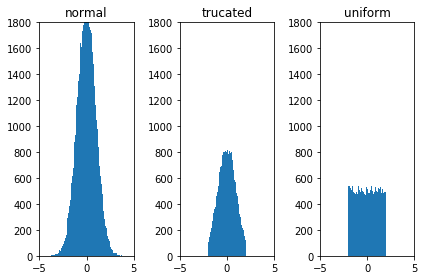

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf

shape = (1, 50000)
mean, std = 0, 1

norm = tf.random.normal(shape, mean, std)
trunc = tf.random.truncated_normal(shape, mean, std)


minval, maxval =  -2, 2
uform = tf.random.uniform(shape, minval, maxval)


for i, (title, x) in enumerate(zip(["normal", "trucated", "uniform"], [norm, trunc, uform])):
    plt.subplot(1,3, i+1)
    plt.title(title)
    plt.hist(x[0], bins=100)
    plt.xlim([-5,5])
    plt.ylim((0,1800))
plt.tight_layout()
plt.show()

### 변수 랜덤수 초기화
* 변수의 초기값을 지정하기 어려운 경우 랜덤 수 사용
* `tf.Variable(tf.random_normal([n, m])`

In [100]:
import tensorflow as tf

x = tf.Variable(tf.random.normal([]), name="x")
y = tf.Variable(tf.random.normal([2,3]), name="y")

print("x:", x)
print("y:", y)

x: <tf.Variable 'x:0' shape=() dtype=float32, numpy=0.6702592>
y: <tf.Variable 'y:0' shape=(2, 3) dtype=float32, numpy=
array([[-0.46557084, -0.8422807 , -0.02792241],
       [ 0.80875695,  2.1228242 ,  0.6558415 ]], dtype=float32)>


## GPU 가속
* Tensorflow는 연산에 CPU/GPU 사용 자동 결정
* NumPy 배열은 CPU only, Tensor는 GPU, TPU 가능
* GPU 배치 확인
    * `tensor.device` : <string>

In [62]:
import tensorflow as tf

tensor = tf.constant(1.0)
print(tensor)
print(tensor.device)

tf.Tensor(1.0, shape=(), dtype=float32)
/job:localhost/replica:0/task:0/device:CPU:0


* 명시적 장치 배치
    * `tf.device`

In [89]:

print("On CPU")
with tf.device("CPU:0"):
    ts = tf.random.uniform(())
    #ts  = tf.convert_to_tensor(10)
    print(ts.device)

if tf.test.is_gpu_available():
    print("GPU Available")
    with tf.device("GPU:0"):
        #ts = tf.constant(10)
        ts = tf.random.uniform(())
        #ts  = tf.convert_to_tensor(10)
        print(ts.device)
        

On CPU
/job:localhost/replica:0/task:0/device:CPU:0
GPU Available
/job:localhost/replica:0/task:0/device:GPU:0


## 자동 미분
* `tf.GradientTape([persistent=True])`
    * `gradient()`
* 컨텍스트 내의 모든 정방향(forward-pass) 연산을 Tape에 기록
* 역방향 자동 미분 연산(reverse mode differentiantion)후 폐기
    * `grandient()` 함수는 1회용
    * `persistent=True` : 동일한 연산에 대해 여러 미분을 계산
* 컨텍스트 내의 중간 계산 값도 미분 가능
* 연산내 추적
    * Variable은 자동 추적
    * constant는 `tape.watch(const)` 필요

In [82]:
#x = tf.constant(3.0)
x = tf.Variable(3.0)
with tf.GradientTape(persistent=True) as tape:
    #tape.watch(x)
    y = x * x  # x^2
    z = y + y  # 2* x^2
    print(x, y, z) 
dz_dx = tape.gradient(z, x)  # 12.0 (4x at x = 3)
dy_dx = tape.gradient(y, x)  # 6.0 (2x at x =3)
print("dz_dx:", dz_dx)
print("dy_dx:", dy_dx)
del tape  # 테이프에 대한 참조를 삭제합니다.

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0> tf.Tensor(9.0, shape=(), dtype=float32) tf.Tensor(18.0, shape=(), dtype=float32)
dz_dx: tf.Tensor(12.0, shape=(), dtype=float32)
dy_dx: tf.Tensor(6.0, shape=(), dtype=float32)


## Dataset
* `tf.data.Dataset`
    * 모델에 데이타를 제공하기 위한 파이프라인 구축
    * 팩토리 함수
        * `tf.data.Dataset.from_tensors`
        * `tf.data.Dataset.from_tensor_slices`
    * 파일 읽기 
        * `tf.data.TextLineDataset(filename)` :
    * 소스 데이터셋
        * `tf.data.TFRecordDataset`